## Business Problem 1

a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan 
amounts)

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
loans_data = pd.read_csv('LoansData.csv')
loans_data
print(loans_data.shape)
print(loans_data.info())
print(loans_data.dtypes)


(2500, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6

In [8]:
import pandas as pd
import statsmodels.api as sm
loans_data = pd.read_csv('LoansData.csv')
loans_data['Interest.Rate'] = loans_data['Interest.Rate'].str.replace('%', '').astype(float)

cleaned_loans_data = loans_data.dropna(subset=['Amount.Requested', 'Interest.Rate'])
X = cleaned_loans_data['Amount.Requested']
y = cleaned_loans_data['Interest.Rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print("Conclusion :")
print("Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)")

                            OLS Regression Results                            
Dep. Variable:          Interest.Rate   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     310.2
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.58e-65
Time:                        22:20:05   Log-Likelihood:                -6969.0
No. Observations:                2498   AIC:                         1.394e+04
Df Residuals:                    2496   BIC:                         1.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.8581      0.148  

b. Loan length is directly effecting intrest rate.

In [9]:
from scipy.stats import ttest_ind
loans_data = pd.read_csv('LoansData.csv')
loans_data['Interest.Rate'] = loans_data['Interest.Rate'].str.replace('%', '').astype(float)
cleaned_loans_data = loans_data.dropna(subset=['Loan.Length', 'Interest.Rate'])

interest_36_months = cleaned_loans_data[cleaned_loans_data['Loan.Length'] == '36 months']['Interest.Rate']
interest_60_months = cleaned_loans_data[cleaned_loans_data['Loan.Length'] == '60 months']['Interest.Rate']

t_stat, p_value = ttest_ind(interest_36_months, interest_60_months)

print(t_stat)
print(p_value)
print("Conclusion :")
print("Loan length is directly effecting intrest rate.")

-23.404324256626744
1.0952664487978044e-109
Conclusion :
Loan length is directly effecting intrest rate.


c. Inrest rate varies for different purpose of loans

In [11]:
from scipy import stats
stats.spearmanr(loans_data["Interest.Rate"],loans_data["Loan.Purpose"])

SignificanceResult(statistic=nan, pvalue=nan)

In [13]:
from scipy.stats import f_oneway
loans_data = pd.read_csv('LoansData.csv')
loans_data['Interest.Rate'] = loans_data['Interest.Rate'].str.replace('%', '').astype(float)
cleaned_loans_data = loans_data.dropna(subset=['Loan.Purpose', 'Interest.Rate'])

grouped_data = [group['Interest.Rate'].values for name, group in cleaned_loans_data.groupby('Loan.Purpose')]

f_stat, p_value = f_oneway(*grouped_data)

print(f_stat)
print(p_value)
print("Conclusion :")
print("Interest rate varies for different purpose of loans")


7.481404351302255
1.1686298123677374e-14
Conclusion :
Interest rate varies for different purpose of loans


d. There is relationship between FICO scores and Home Ownership. It means that, People 
with owning home will have high FICO scores.

In [14]:
relation_FICO_and_homeownership= pd.crosstab(loans_data["Home.Ownership"],loans_data["FICO.Range"])
relation_FICO_and_homeownership

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,90,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [15]:
stats.chi2_contingency(relation_FICO_and_homeownership)

Chi2ContingencyResult(statistic=473.0524636834602, pvalue=1.202159201024428e-35, dof=148, expected_freq=array([[2.29475370e+00, 1.37685222e+00, 4.58950741e-01, 1.83580296e+00,
        5.73688426e+01, 6.65478574e+01, 7.84805767e+01, 7.61858230e+01,
        7.20552663e+01, 6.24173008e+01, 6.42531037e+01, 7.02194634e+01,
        6.01225471e+01, 6.14993993e+01, 5.09435322e+01, 4.26824189e+01,
        5.23203845e+01, 4.31413696e+01, 4.31413696e+01, 2.98317982e+01,
        2.43243893e+01, 2.47833400e+01, 2.79959952e+01, 2.11117341e+01,
        2.11117341e+01, 1.65222267e+01, 7.80216260e+00, 1.00969163e+01,
        1.28506207e+01, 8.72006408e+00, 9.17901482e+00, 5.96635963e+00,
        5.96635963e+00, 5.04845815e+00, 3.67160593e+00, 2.75370445e+00,
        4.58950741e-01, 4.58950741e-01],
       [2.00240288e-03, 1.20144173e-03, 4.00480577e-04, 1.60192231e-03,
        5.00600721e-02, 5.80696836e-02, 6.84821786e-02, 6.64797757e-02,
        6.28754505e-02, 5.44653584e-02, 5.60672807e-02, 6.12735

## Business Problem 2

BUSINESS PROBLEM: We would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry

In [16]:
price_data=pd.read_csv('Price_Quotes.csv')

In [17]:
price_data.describe()

,Order_Number,Barry_Price,Mary_Price
count,12.000000,12.000000,12.000000
mean,6.500000,124.333333,114.750000
std,3.605551,20.698412,11.054616
min,1.000000,94.000000,97.000000
25%,3.750000,106.750000,107.000000
50%,6.500000,131.000000,114.000000
75%,9.250000,140.500000,121.000000
max,12.000000,152.000000,133.000000


In [18]:
f_stat, p_value =stats.ttest_rel(price_data["Mary_Price"],price_data["Barry_Price"])
print(f_stat)
print(p_value)
print("Conclusion: ")
print("Yes,there is difference between the average price quotes provided by Mary and Barry")

-2.5213765108923494
0.02840588045242053
Conclusion: 
Yes,there is difference between the average price quotes provided by Mary and Barry


## Business Problem 3

BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the \
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort\
changed the critical incidence rate. Isthere evidence that the critical incidence rate\
improved?

In [19]:
treatment_facility=pd.read_csv('Treatment_Facility.csv')
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [20]:
treatment_facility.rename(columns={"VAR4":"TRFF", "VAR5": "CI"}, inplace =True )
prior= treatment_facility[treatment_facility["Reengineer"]=="Prior"]["CI"]
post= treatment_facility[treatment_facility["Reengineer"]=="Post"]["CI"]
f_stat, p_value = stats.ttest_ind(prior,post)
print(f_stat),print(p_value)
print("Conclusion :")
print("There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate")

1.627914425352865
0.12091989189884148
Conclusion :
There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate


## Business Problem 4

BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then\
high priority jobs, on average, should be completed more quickly than medium priority jobs,\
and medium priority jobs should be completed more quickly than low priority jobs. Use the\
data provided to determine whether thisis, in fact, occurring.

In [21]:
priority_data = pd.read_csv("Priority_Assessment.csv")

In [22]:
priority_data.describe()

,Days
count,642.000000
mean,2.946262
std,6.687063
min,0.100000
25%,0.200000
50%,0.600000
75%,2.500000
max,72.900000


In [23]:
high= priority_data[priority_data["Priority"]=="High"].Days
medium= priority_data[priority_data["Priority"]=="Medium"].Days
low= priority_data[priority_data["Priority"]=="Low"].Days

In [24]:
f_stat, p_value =stats.f_oneway(high,medium,low)
print(f_stat), print(p_value) 
print("Conclusion :")
print("The prioritization system is not working")

1.812311010076072
0.16411459461716182
Conclusion :
The prioritization system is not working


## Business Problem 5

BUSINESS PROBLEM: Use the survey resultsto addressthe following questions\
 What isthe overall level of customer satisfaction?

In [25]:
film_data =pd.read_csv("Films.csv")
film_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [26]:
film_data.Gender.replace({"1": "Male","2":"Female"},inplace=  True)
film_data.Marital_Status.replace({'1': 'Married', '2':'Single'}, inplace=True)
film_data.replace('Slngle','Single', inplace=True)
film_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


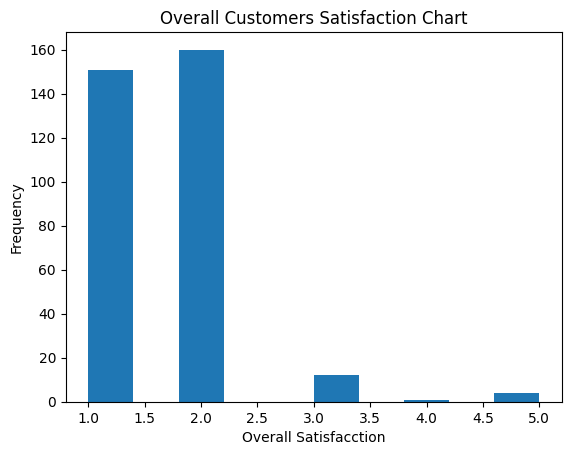

Conclusion :
Customer's Overall Satisfaction is GOOD and EXCELLENT


In [80]:
film_data.Overall.value_counts()
plt.hist(film_data.Overall)
plt.xlabel("Overall Satisfacction")
plt.ylabel("Frequency")
plt.title("Overall Customers Satisfaction Chart")
plt.show()
print("Conclusion :")
print("Customer's Overall Satisfaction is GOOD and EXCELLENT")

b What factors are linked to satisfaction?

In [27]:
overall_and_sinage= pd.crosstab(index=film_data.Overall,columns=(film_data.Sinage))

In [28]:
stats.chi2_contingency(overall_and_sinage)

Chi2ContingencyResult(statistic=124.81695331531306, pvalue=6.47639805161236e-19, dof=16, expected_freq=array([[5.18348624e+01, 7.11009174e+01, 2.20183486e+01, 2.75229358e+00,
        2.29357798e+00],
       [5.52905199e+01, 7.58409786e+01, 2.34862385e+01, 2.93577982e+00,
        2.44648318e+00],
       [4.14678899e+00, 5.68807339e+00, 1.76146789e+00, 2.20183486e-01,
        1.83486239e-01],
       [3.45565749e-01, 4.74006116e-01, 1.46788991e-01, 1.83486239e-02,
        1.52905199e-02],
       [1.38226300e+00, 1.89602446e+00, 5.87155963e-01, 7.33944954e-02,
        6.11620795e-02]]))

In [29]:
overall_and_parking= pd.crosstab(index=film_data.Overall,columns=(film_data.Parking))
stats.chi2_contingency(overall_and_parking)

Chi2ContingencyResult(statistic=229.47943657632044, pvalue=8.162450437897989e-40, dof=16, expected_freq=array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
        1.84709480e+00],
       [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
        1.94495413e+00],
       [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
        1.46788991e-01],
       [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
        1.22324159e-02],
       [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
        4.89296636e-02]]))

In [97]:
overall_and_clean =pd.crosstab(index=film_data.Overall,columns=(film_data.Clean))
stats.chi2_contingency(overall_and_clean)


Chi2ContingencyResult(statistic=125.17708834561675, pvalue=5.517448379868074e-19, dof=16, expected_freq=array([[6.64954128e+01, 7.01896024e+01, 1.10825688e+01, 2.30886850e+00,
        9.23547401e-01],
       [7.00183486e+01, 7.39082569e+01, 1.16697248e+01, 2.43119266e+00,
        9.72477064e-01],
       [5.28440367e+00, 5.57798165e+00, 8.80733945e-01, 1.83486239e-01,
        7.33944954e-02],
       [4.40366972e-01, 4.64831804e-01, 7.33944954e-02, 1.52905199e-02,
        6.11620795e-03],
       [1.76146789e+00, 1.85932722e+00, 2.93577982e-01, 6.11620795e-02,
        2.44648318e-02]]))

In [95]:
print("Conclusion: ")
print("There is a significant correlation between the overall satisfaction level and various factors such as Sinage,\
Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer")

Conclusion: 
There is a significant correlation between the overall satisfaction level and various factors such as Sinage,Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer


 What is the demographic profile of Film on the Rocks patrons?

In [99]:
film_data.Gender.value_counts()

Gender
Female    213
Male      117
Name: count, dtype: int64

In [105]:
213/film_data.shape[0]*100

64.54545454545455

In [104]:
117/film_data.shape[0]*100

35.45454545454545

In [106]:
film_data.Marital_Status.value_counts()

Marital_Status
Single     228
Married    100
Name: count, dtype: int64

In [107]:
228/film_data.shape[0]*100

69.0909090909091

In [108]:
100/film_data.shape[0]*100

30.303030303030305

In [109]:
film_data.Age.value_counts()

Age
2.0    175
3.0    117
1.0     26
4.0     10
Name: count, dtype: int64

In [110]:
film_data.Income.value_counts()

Income
1.0    142
3.0     90
2.0     82
Name: count, dtype: int64

In [111]:
print("         Demographic Profile of Film on the Rocks Patrons :")
print(" ")
print("There are Total of 213 (64.5%) Female Profiles on The Rock Patrons ")
print("There are Total of 117 (35.5%) Males Profile on The Rock Patrons")
print("There are Total of 228 (69.9%) Single Profiles on The Rock Patrons")
print("There are Total of 100 (30.1%) Married Profiles on The Rock Patrons")
print("There are More People from Age group 2 (13-30 years) on The Rock Patrons")
print("There are More People with Income group 1 (Less than $50,000) on The Rock Patrons")

         Demographic Profile of Film on the Rocks Patrons :
 
There are Total of 213 (64.5%) Female Profiles on The Rock Patrons 
There are Total of 117 (35.5%) Males Profile on The Rock Patrons
There are Total of 228 (69.9%) Single Profiles on The Rock Patrons
There are Total of 100 (30.1%) Married Profiles on The Rock Patrons
There are More People from Age group 2 (13-30 years) on The Rock Patrons
There are More People with Income group 1 (Less than $50,000) on The Rock Patrons


 In what media outlet(s) should the film series be advertised?

In [114]:
film_data.Hear_About.value_counts()
film_data.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)

In [115]:
film_data.Hear_About.value_counts()

Hear_About
5    234
4     41
1     22
3     14
2     12
Name: count, dtype: int64

In [116]:
film_data.Hear_About=film_data.Hear_About.astype("float")

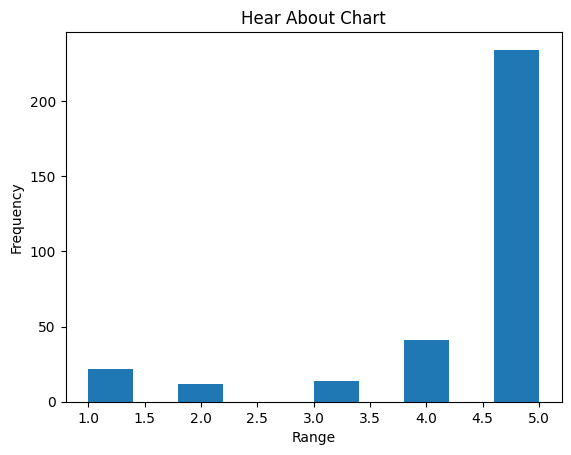

The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION


In [118]:
plt.hist(film_data.Hear_About)
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Hear About Chart')
plt.show()
print("The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION")